# Introduction to Machine Learning - CSE 474/574

## A practical introduction to IPython Notebook
## Some notes about installation:

### Don't do this:

```
sudo apt-get install ipython-notebook
```

### Instead, do this:

```
pip install ipython tornado pyzmq
```

or install Anaconda from [http://store.continuum.io](http://store.continuum.io)

You can start IPython notebook by running

```
ipython notebook --pylab inline
```

### Lets get started with some simple Bayesian analysis
Adapted from [Probabilistic Programming and Bayesian Methods for Hackers](http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Prologue/Prologue.ipynb)

#### Task - Estimate the probability of getting a heads for a coin (should be 0.5 for an unbiased coin)

- Frequentist Approach: Draw several samples and estimate the parameters that best explain the observation (maximum likelihood)
- Bayesian Approach: Start with an initial estimate of the parameter (Prior) and combine it with the likelihood to get an estimate that combines prior and observations (Posterior)

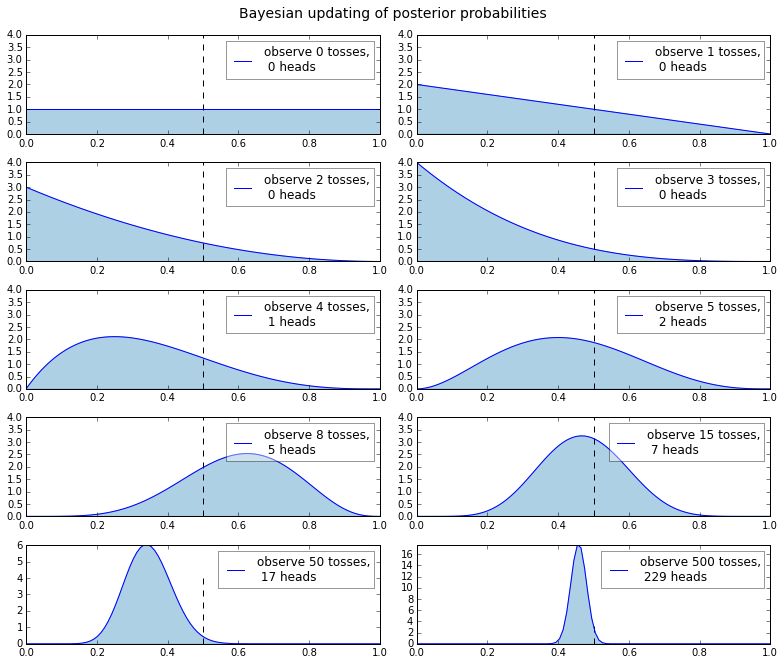

In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta # this is the prior distribution
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
# here we draw samples from a bernoulli distribution which models a coin tossing
# note that in next line we are using 0.5 as the parameter for the Bernoulli distribution
# which means that we are using a fair coin. However during estimation we do not assume knowledge
# of the true parameter
data = stats.bernoulli.rvs(0.5, size=n_trials[-1]) 
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior. 
# (more about this in a few weeks when we get to Probability based methods)
for k, N in enumerate(n_trials):

    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)

#    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum() # choose only the first N samples in each iteration
    y = dist.pdf(x, 1 + heads, 1 + N - heads) # find the posterior distribution
    # note that in the above line we are computing the posterior distribution for the parameter
    # assuming that the prior distribution is uniform over [0,1]
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

### Some basic linear algebra

Our goal is to understand and, if possible, solve the system of $n$ linear equations

$$
\begin{align}
a_{00}\,x_0 + a_{01}\,x_1 + \ldots + a_{0,n-1}\,x_{n-1}   &= b_0 \\\
a_{10}\,x_0  + a_{11}\,x_1 + \ldots + a_{1,n-1}\,x_{n-1}   &= b_1 \\\
\vdots &  \\\
a_{n-1,0}\,x_0 + a_{n-1,1}\,x_1 + \ldots + a_{n-1,n-1}\,x_{n-1} &= b_{n-1}\ .
\end{align}
$$

In the system, the $a_{ij}$s and $b_i$s are known, while the $x_i$s are the unkown variables we wish to solve for. In other words, <span class="hiterm">solving</span> the system means finding the values for the $x_i$s using the $a_{ij}$s and $b_i$s. 

Using matrix notation, we can write the system as

$$
\begin{pmatrix}
a_{00} & a_{01} & \ldots & a_{0,n-1} \\\
a_{10} & a_{11} & \ldots & a_{1,n-1} \\\
\vdots &  &   \ddots & \vdots \\\
a_{n-1,0} & a_{n-1,1} & \ldots & a_{n-1,n-1}
\end{pmatrix} \,
\begin{pmatrix} x_0 \\\ x_1 \\\ \vdots \\\ x_{n-1}\end{pmatrix}
=
\begin{pmatrix} b_0 \\\ b_1 \\\ \vdots \\\ b_{n-1}\end{pmatrix}\ 
$$

<p class = "hangpar">or $Ax = b$. In this form, a solution to the system is the vector $x$ that satisfies the equation.</p>




In [2]:
# a simple example
import numpy as np
import numpy.linalg as la

A = np.matrix([[  2, 3,  1],
              [0.5, 2, 0],
              [ -1, 5, -7]])
b = np.matrix([[10],[-3],[2]])
x = la.inv(A)*b
print x

[[ 17.07692308]
 [ -5.76923077]
 [ -6.84615385]]


In [3]:
# what happens with the following matrix
A = np.array([[  2, 3,  1],
              [0.5, 2, -1],
              [ -1, 5, -7]])
b = np.matrix([[10],[-3],[2]])
x = la.inv(A)*b
print x

LinAlgError: Singular matrix

Here the third column, A⋅2 is equal to 2×A⋅0−1×A⋅1, so the columns of this matrix are not linearly independent. This relationship means that x2=2x0−x1, so x2 is not an independent variable, and we really only have two variables in three equations. There will be an infinite number of combinations of x0 and x1 that solve the system.

When the columns of A are not linearly independent, and A has no inverse, it’s called singular or degenerate.